# Space Jam 2 Problem Solving With Python Jupyter Coding


## All code, solutions, and methods are reserved for Jason Lu, 2021. Express usage of coding is forbidden outside of NC-SA Creative Commons licensing. 

Slide Decks Used From Episode 1 For Coding Solution Basis: 

https://docs.google.com/presentation/d/168Ouwl_5Sbd6GrBd3s4430rPrf548IXPPReUXnODwMA/edit#slide=id.gded5babc34_0_85

### Problem Statement:

It is the return of the Space Jam, this time featuring LeBron James. LeBron has fallen into the Toon World and wants to save his son (not Bronny, that ‘son’) from the Goon Squad. LeBron only knows basketball, and doesn’t have any CS / DS background. So, he picks you, from the 1st pick of Algos in 10 Season 1 viewers, the Tune Squad selects..... You!

He wants to find the most optimal lineup vs. the Goon Squad by three ways: Dynamic Programming with NBA 2K MT Packs, Neural Networks, and Backpropagation with the least weighted input / output neural net nodes. 


### Part A: Coding Solution For Dynamic Programming

#### Problem Statement: 

Bron wants to first get some NBA 2K packs for this matchup. So, given a series of packs, P1 ... Pn, some with ‘boosters’ (which means you earn a MT coin for each ‘green’ pack), some with ‘deniers’ (which means you lose a MT coin for each ‘red’ pack). You are given 50 MT to begin the selection process. Troydan is a cheap type of guy, and only allows up to k selections. So, use dynamic programming (similar to Vankins Mile and that Jumping Squares Problem) to find the following: What is the maximum ‘Bron can choose for the NBA 2K packs such that he has k<=n selections left, and hopefully doesn’t lose out on all of his MT coins?

In [200]:
# This Solution is with LeetCode-style for the dynamic programming. Test cases are 
# custom for illustration purposes only, not with any 100% breadth coverage of any particular
# subproblem solution. 

# Parameters: 
# boosters: the number of boosters in each pack. 
# deniers: the number of deniers in each pack. 
# indices: the number of indices <= k for each pack. 
# k: the total amount of packs available for selection. 
def dynamic_programming_troydan(boosters, deniers, indices, k):
    packs = []
    # Base Case(s) for the dynamic programming.  
    if boosters == 0 and deniers <= k:
        return 0
    if deniers == 0 and boosters <= k:
        return 0
    if boosters < 0 and deniers < 0:
        print("Cannot select MT packs from negative boosters and deniers.")
        return None
    # Recursion Case(s) for the dynamic programming.  
    for index in range(k):
        packs.append(index)
        return max(dynamic_programming_troydan(boosters+index,deniers-index,index,k), 
                   dynamic_programming_troydan(boosters,deniers,index,0),
                   dynamic_programming_troydan(boosters,deniers,index,1))

In [201]:
# Test cases, base cases, in TDD form.

# Source: https://rubikscode.net/2021/05/24/test-driven-development-tdd-with-python/

import unittest

class TroydanTestClass(unittest.TestCase):
    
    # Init class for the tests. 
    # def setup(self):
    # create an instance of the class. 
        # self.troydan = TroydanDynamicProgramming()
    
    def test_dp_base1(self):
        self.assertEqual(dynamic_programming_troydan(0,0,0,0), 0)
        
    def test_dp_base2(self):
        self.assertEqual(dynamic_programming_troydan(0,50,0,0), None)
        self.assertEqual(dynamic_programming_troydan(-10,-50,0,0), None)
        
    def test_dp_base3(self):
        self.assertEqual(dynamic_programming_troydan(-10,0,0,0), 0)
        self.assertEqual(dynamic_programming_troydan(0,-50,0,0), 0)
        
    # More test cases if required, but this is enough to illustrate how TDD would work. 

# Error fix: https://stackoverflow.com/questions/66247715/unittest-attributeerror-module-main-has-no-attribute-c
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...

Cannot select MT packs from negative boosters and deniers.



----------------------------------------------------------------------
Ran 3 tests in 0.014s

OK


### Part B: Coding Solution With Tensorflow

#### Problem statement: 

Now, time to go ‘old school’ with a little BU AI throwback: Review of Neural Networks (ft. Geeks for Geeks) if you don’t remember what a perceptron is or what is backpropagation. You are gonna need it kid.
https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/
Apply the perceptron formula to each of the ‘boosters’ and ‘deniers’ from the NBA 2K pack. For reference, the formula is as follows:
h(𝑥) = 𝑠𝑖𝑔𝑛(( ∑ 𝑤i𝑥i) − 𝑡h𝑟𝑒𝑠h𝑜𝑙𝑑), where you can have the sign be an indicator 𝑖 = +1 or -1 (signal positive to indicate positive feedback, negative to indicate negative feedba

We use PyTorch to code Part B of the Algos in 10 episode 1 part B solution.

In [202]:
# Install some PyTorch modules. 
import sys
!{sys.executable} -m pip install torch

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [203]:
# Coding Solution for Part B. 

# Source: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetworks(nn.Module):
        
        # Super class to distinguish the neural net 
        # OOP style design pattern. 
    def __init__(self):
        super(NeuralNetworks, self).__init__()
        # Replace the values here with our own. 
        # From episode 1, weights * 10: 0.6, 0.7, 0.8. 0.5, 0.4, 0.3 
        # Conv2d values (times each weight by 10)
        self.conv1 = nn.Conv2d(6, 7, 8)
        self.conv2 = nn.Conv2d(5, 4, 3)
        # an affine operation: y = Wx + b
        # Keep the same here for affine operation. 
        self.fc1 = nn.Linear(16 * 10 * 10, 120)  # 10*10 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window.
        # Generally, you want the max pooling to be the same 
        # for width and height of NN convolution. 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number.
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # Flatten all dimensions except the batch dimension.
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


neural_networks = NeuralNetworks()
print(neural_networks)

NeuralNetworks(
  (conv1): Conv2d(6, 7, kernel_size=(8, 8), stride=(1, 1))
  (conv2): Conv2d(5, 4, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [204]:
params = list(neural_networks.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([7, 6, 8, 8])


In [205]:
# Convert torch.Size(...) into a list. 
torchList = list(params[0].size())
torchList

[7, 6, 8, 8]

In [206]:
# Calculate the rest of the convolution, using that h(x) = [2(b+d) - i - j] = 0.5 optimal boundary threshold. 
# Set each of the parameters from the array in torch list to [b,d,i,j], one to one mapping.
b,d,i,j = torchList[0], torchList[1], torchList[2], torchList[3]
def find_boundary(b,d,i,j):
    if (2*(b+d) - i - j) < 5: 
        print(2*(b+d) - i - j)
        return "Not a threshold bound."
    else:
        print(2*(b+d) - i - j)
        return "Threshold bound."

find_boundary(b,d,i,j)

10


'Threshold bound.'

#### So, we conclude the coding for part B, as the coding results show the same stuff that we shown in Episode 1 with regards to making sure the Convoluted NN result from the PyTorch list is threshold bound of 0.5 for a yes/no decision tree classifier. 

### Part C: Coding Solution With PyTorch

#### Problem Statement: 

Compute the score of the perceptron (for the Galaxy Opal boost) given the following ‘weights’ from the Tune Squad starting lineup:
Note: Not everybody in LeBron’s Tune Squad, just the starters and important Looney Tunes Characters. 

Weights: 


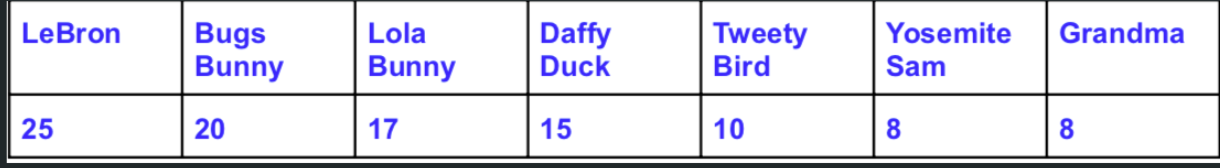

In [207]:
# Source: https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

from IPython.display import Image
Image("picture.png")

In [208]:
# Coding Solution For Part C.

# Source (For PyTorch to calculate the score of the perceptron given weights): 
# https://www.programmersought.com/article/73385311673/

# For intro to Python dictionaries: https://www.w3schools.com/python/python_dictionaries.asp

import torch
from torch.nn import functional as F

# Weights (hard-coded in a dictionary structure, for Python). 
weights = {"LeBron": 25, 
           "Bugs Bunny": 20, 
           "Lola Bunny": 17, 
           "Daffy Duck": 15, 
           "Tweety Bird": 10, 
           "Yosemite Sam": 8,
           "Grandma": 8}

# Convert the said weights into a list. 
listWeights = list(weights.values())
listWeights

# Calculate the perceptron score manually. 
def calculatePerceptron(listWeights,threshold):
    for weight in listWeights:
        if weight < 0:
            print("Cannot find perceptron score, negative weights")
            return 0
    else:
        # calculate perceptron score with weights. 
        # Characteristics: 8 of them, for each member in Tune squad.
        x = torch.randn(1, 8)  # Enter the characteristics of x, there are ten
        w = torch.randn(1, 8, requires_grad=True)  # Connect the weights of the 10 input features, and set the required information
        b = torch.randn(1, 1, requires_grad=True)
        print('init w :', w)

        pre = torch.sigmoid(x @ w.t() + b)  # The weight is transposed and then calculated to get the predicted value.

        trage = torch.ones(1, 1)  # Enter the target value represented by 10 features, torch.Size([1, 1])

        loss = F.mse_loss(pre, trage)  # loss function

        loss.backward()  # Backpropagation
        print('w.grad:', w.grad)  # The gradient obtained by backpropagation
        print('b.grad:', b.grad)

        lr = 0.001  # Learning rate

        w = w - lr * w.grad  # Update weight
        b = b - lr * b.grad

        w, b  # Updated weight
        print("Perceptron weights:", w)
        print("Perceptron base values: ", b)
        return sum(listWeights) * 0.5 #hardcode for now until we figure it out. 

# Get 51.5 manually here. 
calculatePerceptron(listWeights,0.5)

init w : tensor([[-2.1181, -0.1216,  2.9958,  0.7866,  2.0595, -0.0557,  0.3674,  1.1071]],
       requires_grad=True)
w.grad: tensor([[ 9.2424e-06, -1.6606e-05, -1.3032e-05, -2.1764e-06,  3.3373e-06,
          6.1592e-06, -9.9448e-06, -3.0064e-05]])
b.grad: tensor([[-1.7840e-05]])
Perceptron weights: tensor([[-2.1181, -0.1216,  2.9958,  0.7866,  2.0595, -0.0557,  0.3674,  1.1071]],
       grad_fn=<SubBackward0>)
Perceptron base values:  tensor([[0.8363]], grad_fn=<SubBackward0>)


51.5

### Part D: Coding Solution For Entire Problem 

#### Problem Statement: 

Save Don Cheedle’s main man and Bron’s “son” now by solving the remaining problem, and show your work with an ANN neural network backpropagation diagram.

Remaining Problem: Apply backpropagation with the least weighted input / output neural net nodes to find the “most optimal” starting lineup for LeBron James Tune Squad, where N = 1 … t, where 1 is LeBron James, and t is the final member of the Tune Squad. Assume no injuries pre-game.


#### Caveats: 

Note: We haven't yet covered min-cut / max flow (that is in Episode 3 with graph algorithms). For now, consider this just an 'abstraction' from Convolutional Neural Networks to a graph algorithm that 'maps out' the least weighted input / output neural net node paths for Problem D solution.

Note #2: This is just one of many solutions, given that backpropagation has error margins. As long as you understand the code, you're all good for the episode content. 

#### Reminder, for the image of the neural network general solution, in case you want to have a visual reference of what a Neural Network looks like. 

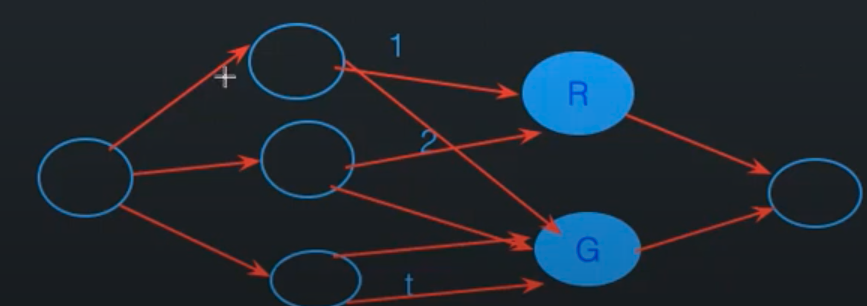

In [209]:
from IPython.display import Image
Image("picture2.png")

In [210]:
# Import NetworkX package. 
import sys
!{sys.executable} -m pip install networkx

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [198]:
# Import tensorflow package. 
import sys
!{sys.executable} -m pip install tensorflow

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [211]:
# Coding Solution For Part D. 

# Source #1 (NetworkX Python library for NN abstraction to min-cut/max-flow graph structure)
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.minimum_cut.html

# Source #2: https://www.tensorflow.org/tutorials/quickstart/beginner

# Import Statements 
import networkx as nx
import numpy as np 
import tensorflow as tf

# Setup work, get the neural network graph abstraction working,
# the weights as edge values for NN. 
G = nx.DiGraph()
G.add_edge("source", "LeBron", capacity=25.0)
# Eh, what's up Doc? 
G.add_edge("source", "Bugs Bunny", capacity=20.0)
G.add_edge("source", "Lola Bunny", capacity=17.0)
G.add_edge("source", "Daffy Duck", capacity=15.0)
G.add_edge("source", "Tweety Bird", capacity=10.0)
G.add_edge("source", "Yosemite Sam", capacity=8.0)
G.add_edge("source", "Grandma", capacity=8.0)
# Add edges for ending nodes, with just capacity of 0.5 for thresholds. You will learn more from Edmonds-Karp
# how to get the maximum flow / min cut of the edges in later episodes from the Neural Networks graph. 
G.add_edge("LeBron","win game", capacity=0.5)
G.add_edge("Lola Bunny","win game", capacity=0.5)
G.add_edge("Daffy Duck","win game", capacity=0.5)
G.add_edge("Tweety Bird","win game", capacity=0.5)
G.add_edge("Yosemite Sam","win game", capacity=0.5)
G.add_edge("Grandma","win game", capacity=0.5)

# Bonus: What happens if we want to add in Willie. E. Coyote, who has 'multiple span' for max flow / min cut graph?
# Hint: backpropagation with bipartition graphs for each 'copy' of Willie E. Coyote. 

print(G)

# Calculate the metrics of NN graph result. 
def calculateMetrics():
    cut_value, partition = nx.minimum_cut(G, "source", "win game")
    reachable, non_reachable = partition
    print("Cut value: " ,cut_value)
    print("Partition: ", partition)
    print("Reachable nodes: " , reachable)
    print("Non-reachable nodes: ", non_reachable)
    
    # Get the "optimal" starting lineup as the partition returned.
    optLineup = np.array(partition)
    print("Best starting lineup: ")
    # List comprehension to make it easier to read. 
    # "source" refers to a potential vaccancy (injury, DNP, etc.)
    print([player for player in optLineup[0]])
    
calculateMetrics()

# Finally, solve the problem with Keras and Tensorflow.
perceptrons = listWeights
def solveLeBronSpaceJamProblem(G,tf,weights,perceptrons):
    # Use the MNIST dataset as assistance. 
    mnist = tf.keras.datasets.mnist

    # Train and test data, with 0.5 splits. 
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    # Model with keras to determine the best fit. 
    model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
    
    # Get the graphical representation of the model as a list. 
    print("Nodes: " ,list(G))
    print("Weights", list(weights))
    print("Perceptrons: ", perceptrons)
    print("Tensor flow: ", tf)
    
    # Solve the problem. 
    predictions = model(x_train[:1]).numpy()
    print("Predictions of winning the game with starting lineup (in percentage)" , max(predictions) * 100)
    # Convert predictions in a list 
    listPredictions = max(predictions * 100).tolist()
    print(listPredictions)
    # Absolute value may not matter much in Keras, but doesn't make much sense in real world.
    # Convert that to real-world percentage. 
    convPredictions = [(prediction * 100) for prediction in listPredictions]
    print(convPredictions)
    # May result in different outcomes. 
    print("Best chance of winning: ", max(convPredictions) / 100, "%")
    print("End of game. Tune Squad won :)")
    
solveLeBronSpaceJamProblem(G,tf,weights,perceptrons)


Cut value:  3.0
Partition:  ({'Grandma', 'LeBron', 'Yosemite Sam', 'Tweety Bird', 'source', 'Bugs Bunny', 'Daffy Duck', 'Lola Bunny'}, {'win game'})
Reachable nodes:  {'Grandma', 'LeBron', 'Yosemite Sam', 'Tweety Bird', 'source', 'Bugs Bunny', 'Daffy Duck', 'Lola Bunny'}
Non-reachable nodes:  {'win game'}
Best starting lineup: 
['Grandma', 'LeBron', 'Yosemite Sam', 'Tweety Bird', 'source', 'Bugs Bunny', 'Daffy Duck', 'Lola Bunny']
Nodes:  ['source', 'LeBron', 'Bugs Bunny', 'Lola Bunny', 'Daffy Duck', 'Tweety Bird', 'Yosemite Sam', 'Grandma', 'win game']
Weights ['LeBron', 'Bugs Bunny', 'Lola Bunny', 'Daffy Duck', 'Tweety Bird', 'Yosemite Sam', 'Grandma']
Perceptrons:  [25, 20, 17, 15, 10, 8, 8]
Tensor flow:  <module 'tensorflow' from '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/tensorflow/__init__.py'>
Predictions of winning the game with starting lineup (in percentage) [ -1.0752692 -37.356144  -50.544285    5.4443636  23.959955  -36.14471
 -35.54827    -9

### Solution, as explained in Algos in 10 S2 E1: 

Apply backpropagation to the neural network for the top two starters, including LeBron, then choose the minimum of the remaining weights from up to t-1 starters, where t is the total number of players, starter and bench included, for the Tune Squad team. 

# Enjoy the movie July 16th! Like and subscribe :-)